# Algorithm 1: Split-and-Merge

**Data**: Set S consisting of all N points, a distance threshold d > 0

**Result**: L, a list of sets of points each resembling a line 
```
L ← (S), i ← 1;
while i ≤ len(L) do
  fit a line (r,α) to the set Li;
  detect the point P ∈ Li with the maximum distance D to the line (r, α);
  if D < d then 
    i←i+1
  else
    split Li at P into S1 and S2;
    Li ← S1; Li+1 ← S2; 
  end
end

Merge collinear sets in L;
```

## Reference

Roland Siegwart, Illah Nourbakhsh, and Davide Scaramuzza. Introduction to Autonomous Mobile Robots. MIT Press, 2nd edition, 2011.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from SplitAndMerge.split_and_merge import SplitAndMerge

In [2]:
testdata = []
for i in range(6):
    with open('/Users/hdumcke/git/lidar-simulator/jupyternb/data/testLineExtraction%s.mat.pickle' % str(i+1), 'rb') as f:
        testdata.append(pickle.load(f))

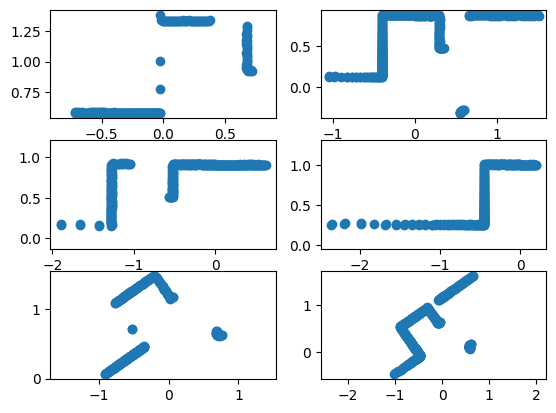

In [3]:
fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    axs[row_index, column_index].scatter(x, y)

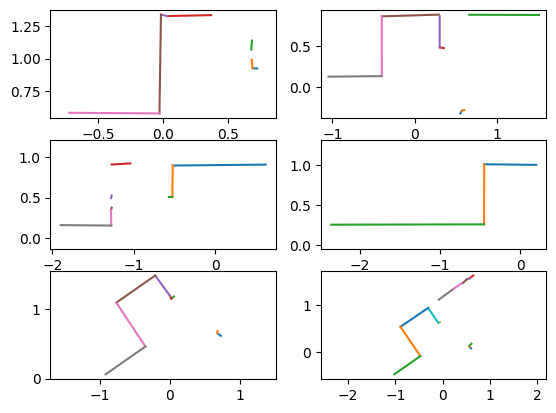

In [4]:
sam = SplitAndMerge(line_point_dist_threshold=0.004, min_points_per_segment=4, min_seg_length=0.01)

fig, axs = plt.subplots(3, 2)
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    x = testdata[i]['rho'] * np.cos(testdata[i]['theta'])
    y = testdata[i]['rho'] * np.sin(testdata[i]['theta'])
    alpha_a, r_a, segend, seglen, pointIdx_a = sam.extractLines(x[0], y[0])
    for j in range(segend.shape[0]):
        axs[row_index, column_index].plot([segend[j,0], segend[j,2]], [segend[j,1], segend[j,3]])

In [5]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("square.stl")

In [6]:
point = [500, 300]
yaw = np.radians(0)
#plot_scan = lidar.get_lidar_points(point[0], point[1], yaw, theta=0, view_range=25)
plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)

In [7]:
# get carthesian coordinates
x = []
y = []
for alpha, r in plot_scan:
    x.append(r * np.cos(alpha)+ point[0])
    y.append(r * np.sin(alpha) + point[1])

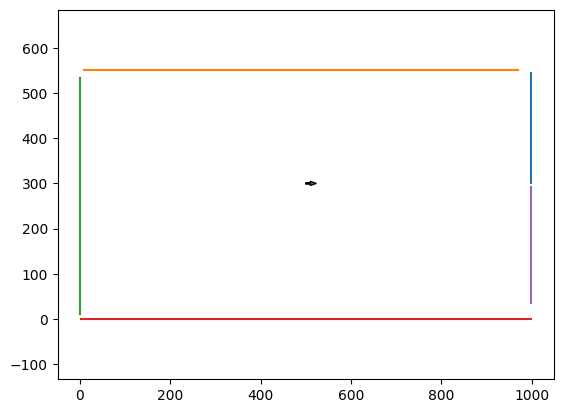

In [8]:
sam = SplitAndMerge(line_point_dist_threshold=0.005, min_points_per_segment=5)

fig,ax = plt.subplots()
ax.axis('equal')
plt.arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
#plt.scatter (x[211:329], y[211:329])
alpha_a, r_a, segend, seglen, pointIdx_a = sam.extractLines(x, y)
for j in range(segend.shape[0]):
    ax.plot([segend[j,0], segend[j,2]], [segend[j,1], segend[j,3]])

In [9]:
def rotate_segend(segend, point, yaw):
    c = np.cos(yaw)
    s = np.sin(yaw)
    j = np.matrix([[c, -s], [s, c]])
    v = np.matrix([[segend[0] - point[0], segend[2] - point[0]], [segend[1] - point[1], segend[3] - point[1]]])
    m = np.dot(j, v)
    p1 = np.squeeze(np.asarray(m.T[0])) + point
    p2 = np.squeeze(np.asarray(m.T[1])) + point
    return [p1[0], p2[0]], [p1[1], p2[1]]

In [10]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("maze.stl")
triangles = lidar.get_map_triangles()
point = [25, 25]
yaw = np.radians(90)

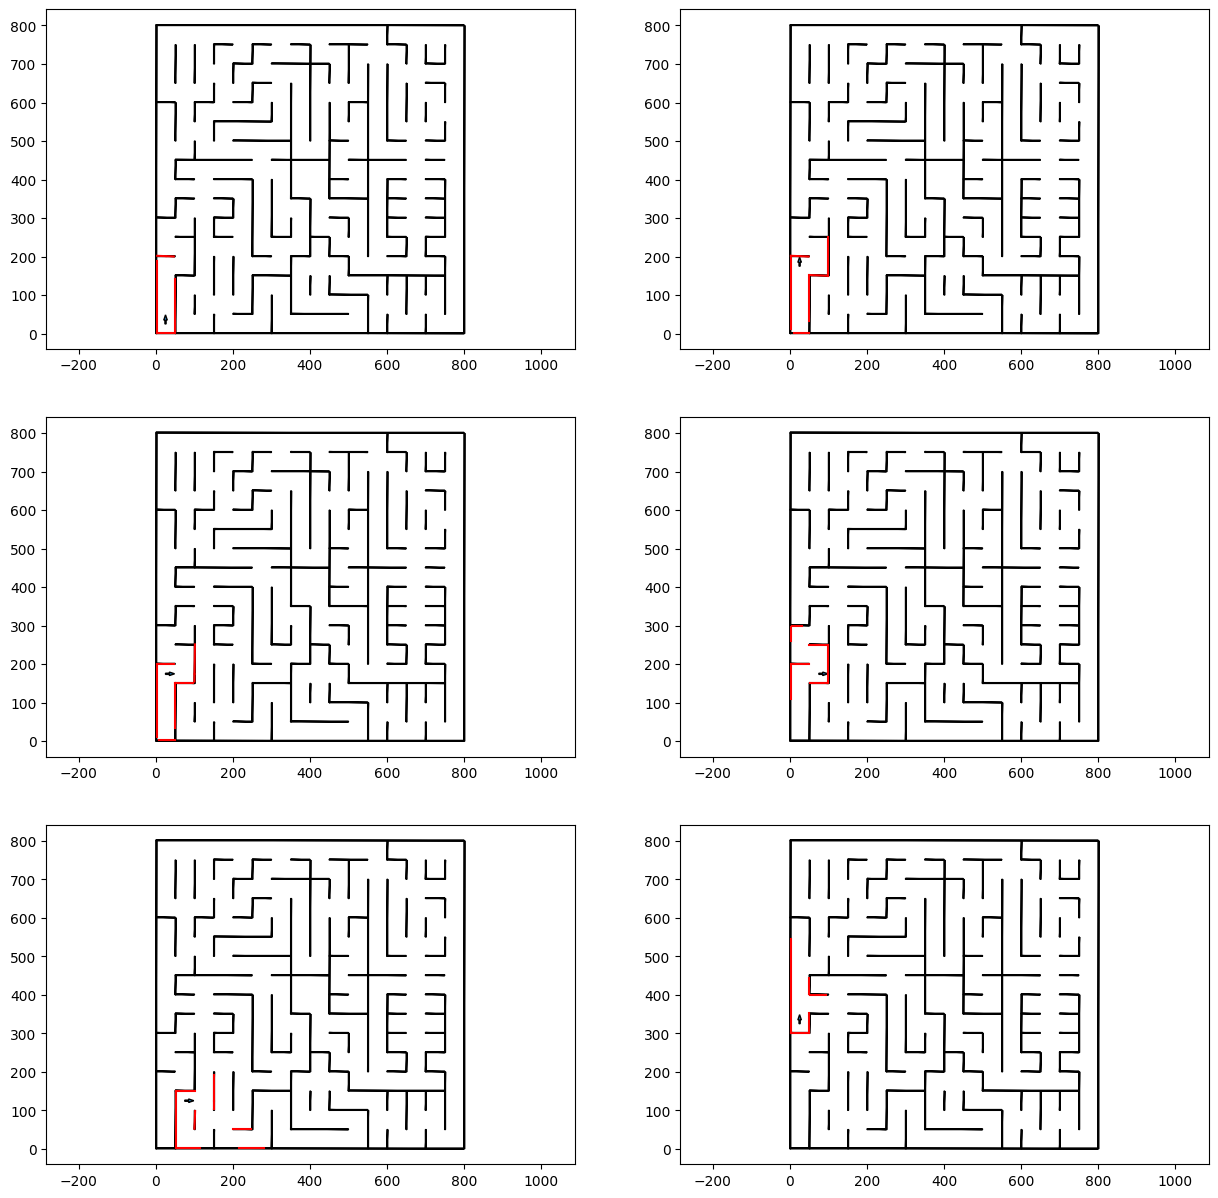

In [11]:
pose = [[25, 25, 90 ],
        [25, 175, 90 ],
        [25, 175, 0 ],
        [75, 175, 0 ],
        [75, 125, 0 ],
        [25, 325, 90 ]]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    point = pose[i][0:2]
    yaw = np.radians(pose[i][2])
    plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)
    # get carthesian coordinates
    x = []
    y = []
    for alpha, r in plot_scan:
        x.append(r * np.cos(alpha)+ point[0])
        y.append(r * np.sin(alpha) + point[1])
    
    sam = SplitAndMerge(line_point_dist_threshold=0.005, min_points_per_segment=5)

    axs[row_index, column_index].arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
    alpha_a, r_a, segend, seglen, pointIdx_a = sam.extractLines(x, y)
    for j in range(segend.shape[0]):
        x_p, y_p = rotate_segend(segend[j], point, yaw)
        axs[row_index, column_index].plot(x_p, y_p, 'r')
    for t in triangles:
        axs[row_index, column_index].fill(t[:, 0],t[:, 1],fill=False)

In [12]:
from LidarSim.lidar_sim import LidarSimulator
lidar = LidarSimulator("racetrack.stl")
triangles = lidar.get_map_triangles()
yaw = np.radians(180)

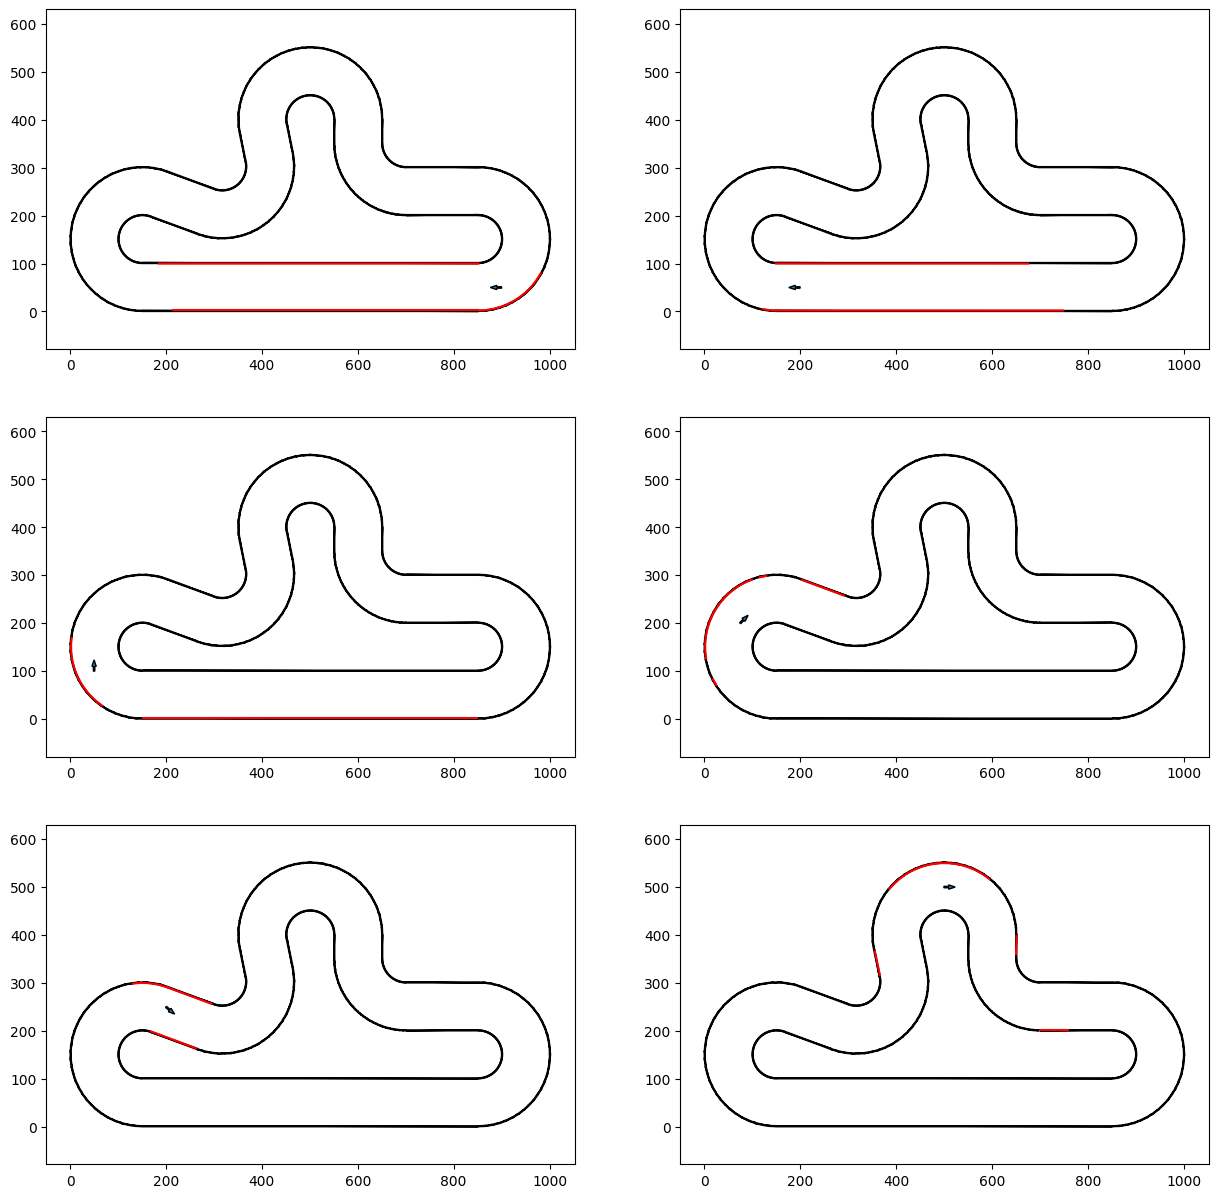

In [14]:
pose = [[900, 50, 180 ],
        [200, 50, 180 ],
        [50, 100, 90 ],
        [75, 200, 45 ],
        [200, 250, -40 ],
        [500, 500, 0 ]]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i in range(6):
    row_index = int(i / 2)
    column_index = i % 2
    axs[row_index, column_index].axis('equal')
    point = pose[i][0:2]
    yaw = np.radians(pose[i][2])
    plot_scan = lidar.get_lidar_points(point[0], point[1], yaw)
    # get carthesian coordinates
    x = []
    y = []
    for alpha, r in plot_scan:
        x.append(r * np.cos(alpha)+ point[0])
        y.append(r * np.sin(alpha) + point[1])
    
    sam = SplitAndMerge(line_point_dist_threshold=0.005, min_points_per_segment=5)

    axs[row_index, column_index].arrow(point[0], point[1], 10 * np.cos(yaw), 10 * np.sin(yaw), width=3.0)
    alpha_a, r_a, segend, seglen, pointIdx_a = sam.extractLines(x, y)
    for j in range(segend.shape[0]):
        x_p, y_p = rotate_segend(segend[j], point, yaw)
        axs[row_index, column_index].plot(x_p, y_p, 'r')
    for t in triangles:
        axs[row_index, column_index].fill(t[:, 0],t[:, 1],fill=False)